# IMPORTING LIBRARIES

In [2]:
import tkinter as tk
from tkinter import *
from PIL import ImageTk
from tkinter import filedialog
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import load_model


# DEFINING FUNCTIONS TO USE AS COMMANDS IN THE GUI

## Opening Files of device to choose an image

In [3]:
def import_file():
     file_path = filedialog.askopenfilename(title="Select a file", filetypes=[("Image files", "*.jpg"), ("All files", "*.*")])
     if file_path:
            image = file_path
            print("selected file", file_path)

## Detecting whether a person in Image chosen is wearning a mask or not

In [13]:
#load the saved model
model = load_model("my_model1.h5")

# Function to load Haar Cascade XML file for face detection
import pkg_resources
haar_xml = pkg_resources.resource_filename('cv2', 'data/haarcascade_frontalface_default.xml')
classifier = cv2.CascadeClassifier(haar_xml)

# Function to import an image file and return the file path
def import_file():
    file_path = filedialog.askopenfilename(
        title="Select an image",
        filetypes=[("Image files", "*.jpg;*.jpeg;*.png"), ("All files", "*.*")]
    )
    return file_path

# Function to detect if a face is wearing a mask in the given image
def detect_mask_in_image():
    file_path = import_file()
    if file_path:
        frame = cv2.imread(file_path)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
       
        faces = classifier.detectMultiScale(frame, 1.1, 4)
        face_roi = None
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            face_roi = frame[y:y+h, x:x+w]

        # If a face is detected, predict mask
        if face_roi is not None:
            final_image = cv2.resize(face_roi, (224, 224))
            final_image = np.expand_dims(final_image, axis=0)
            final_image = final_image / 255.0
           
            predictions = model.predict(final_image)
            mask_worn = predictions[0][0] < 0.5
           
            if mask_worn:
                result_text = "The person is wearing a mask."
                plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                
            else:
                result_text = "The person is NOT wearing a mask."
        else:
            result_text = "No face detected."
       
        # Display the result in a pop-up window
        result_window = tk.Toplevel(root)
        result_window.title("Mask Detection Result")
        result_label = tk.Label(result_window, text=result_text, font=("times", 16, "bold"))
        result_label.pack(padx=20, pady=20)
       


    

## Opeing webcam and detecting whether person in fron of the camera is wearing a mask or not in real time

In [14]:
def real_time_detection():
# Load the saved model
    model = load_model("my_model1.h5")

    # Load the face classifier
    import pkg_resources
    haar_xml = pkg_resources.resource_filename('cv2','data/haarcascade_frontalface_default.xml' )
    classifier = cv2.CascadeClassifier(haar_xml)

    # Initialize the webcam
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        raise IOError("Cannot open the webcam")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame")
            continue

        # Convert the frame to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = classifier.detectMultiScale(gray, 1.1, 4)

        # Draw rectangles around detected faces
        face_rois = []  # Store regions of interest for further processing
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi_color = frame[y:y + h, x:x + w]
            face_rois.append((x, y, w, h, roi_color))

        # Process each detected face for mask detection
        for (x, y, w, h, roi) in face_rois:
            # Resize and normalize the ROI for the model prediction
            final_image = cv2.resize(roi, (224, 224))
            final_image = np.expand_dims(final_image, axis=0)
            final_image = final_image / 255.0

            # Predict mask status
            Predictions = model.predict(final_image)

            # Determine the status based on predictions
            if Predictions > 0.5:  # Adjust threshold as needed
                status = "No Mask On"
                color = (0, 0, 255)  # Red for no mask
            else:
                status = "Face Mask On"
                color = (0, 255, 0)  # Green for mask

            # Display the status on the frame
            cv2.putText(frame, status, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

        # Show the frame with the status and rectangles
        cv2.imshow('Face Mask Detection', frame)

        # Exit on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break  # Exit loop if 'q' is pressed

    # Release the webcam and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


# GUI CODE FOR THE FACE MASK DETECTION SYSTEM:

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step


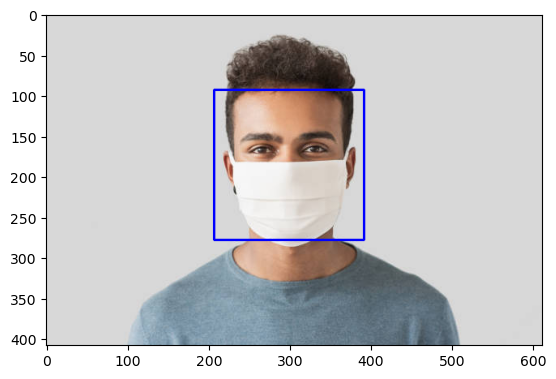

In [15]:
root = Tk()

# window dimensions: 

root.geometry("735x414")

# title:

root.title("Face Mask Detection System")

# bg image:
img= PhotoImage(file="C:/Users/anany/Downloads/output-onlinepngtools.png", 
                master= root)
img_label= Label(root,image=img)
img_label.place(x=0, y=0)

# main text:

main_text = Label(root, text = "Face Mask Detection System", fg = "white", bg = "black", justify = CENTER,
               font = ("times", 35, "bold"))
main_text.grid(padx = 50, pady = 50)
main_text.place(relx = 0.1,
                rely = 0.1)


# labels: 

label1 = Label(root, text = "DETECT MASK", fg = "white", bg = "black", justify = LEFT, font = ("times", 19, "bold"))
label1.grid(padx = 50, pady = 50)
label1.place(relx = 0.13,
             rely = 0.4)

label2 = Label(root, text = "REAL TIME DETECTION", fg = "white", bg = "black", font = ("times", 18, "bold"), justify = LEFT)
label2.grid(padx = 50, pady = 50)
label2.place(relx = 0.57,
             rely = 0.4)


# buttons:


b1 = Button(root, text = "OPEN WEBCAM", fg = "white", bg = "orange", font = ("times", 14, "bold"),
            height = 3, command = real_time_detection)
b1.place(relx = 0.65,
         rely = 0.55)

b2 = Button(root, text = "CLICK HERE", fg = "white", bg = "orange", font = ("times", 14, "bold"),
            height = 3, command = detect_mask_in_image)
b2.place(relx = 0.17,
         rely = 0.55)




root.mainloop()